# Project - Airline Sentiment Analysis

# Importing Libraries

In [1]:
import nltk
# to tag the twitter comments 
nltk.download('averaged_perceptron_tagger')
# word net lemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
# dictionary 
nltk.download('punkt')   
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Shree\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shree\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shree\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shree\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Shree\AppData\Roaming\nltk_data...


True

In [5]:
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords
import string
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing 

# Importing Dataset

In [9]:
dataset = pd.read_csv('train.csv')[0:4000]

In [10]:
dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [11]:
text = dataset['text'].values
text

array(['@VirginAmerica What @dhepburn said.',
       "@VirginAmerica plus you've added commercials to the experience... tacky.",
       "@VirginAmerica I didn't today... Must mean I need to take another trip!",
       ...,
       '@united Yes, though they have not located the bag yet. It was a lovely flight outside of that.',
       '@united Got me home amid snow &amp; Cancelled Flightlations; delivered bag w/o hassle; plus no wait on phone &amp; an upgrade. Thank you!',
       '@united My wife has been on the phone several times for past 3 days, with no result.'],
      dtype=object)

In [12]:
# tokenization to convert paragraphs or sentences in tokens.
text=[word_tokenize(doc) for doc in text]
sentiment=dataset['airline_sentiment'].values

In [13]:
text

[['@', 'VirginAmerica', 'What', '@', 'dhepburn', 'said', '.'],
 ['@',
  'VirginAmerica',
  'plus',
  'you',
  "'ve",
  'added',
  'commercials',
  'to',
  'the',
  'experience',
  '...',
  'tacky',
  '.'],
 ['@',
  'VirginAmerica',
  'I',
  'did',
  "n't",
  'today',
  '...',
  'Must',
  'mean',
  'I',
  'need',
  'to',
  'take',
  'another',
  'trip',
  '!'],
 ['@',
  'VirginAmerica',
  'it',
  "'s",
  'really',
  'aggressive',
  'to',
  'blast',
  'obnoxious',
  '``',
  'entertainment',
  "''",
  'in',
  'your',
  'guests',
  "'",
  'faces',
  '&',
  'amp',
  ';',
  'they',
  'have',
  'little',
  'recourse'],
 ['@',
  'VirginAmerica',
  'and',
  'it',
  "'s",
  'a',
  'really',
  'big',
  'bad',
  'thing',
  'about',
  'it'],
 ['@',
  'VirginAmerica',
  'seriously',
  'would',
  'pay',
  '$',
  '30',
  'a',
  'flight',
  'for',
  'seats',
  'that',
  'did',
  "n't",
  'have',
  'this',
  'playing',
  '.',
  'it',
  "'s",
  'really',
  'the',
  'only',
  'bad',
  'thing',
  'about',


In [14]:
sentiment

array(['neutral', 'positive', 'neutral', ..., 'negative', 'positive',
       'negative'], dtype=object)

In [9]:
#print(all_documents_modified[0])

In [15]:
documents = [(text[i] , sentiment[i]) for i in range(4000)]

In [19]:
documents[0]

(['@', 'VirginAmerica', 'What', '@', 'dhepburn', 'said', '.'], 'neutral')

# Cleaning Dataset (TOKENIZING, LEMMATIZING, (REMOVING STOPWORDS, PUNCTUATIONS) )

In [20]:
lemmatizer = WordNetLemmatizer()

In [21]:
from nltk.corpus import wordnet
def get_simple_pos(tag):
    
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [22]:
stops = set(stopwords.words('english'))
punctuations = list(string.punctuation)
stops.update(punctuations)
stops, string.punctuation

({'!',
  '"',
  '#',
  '$',
  '%',
  '&',
  "'",
  '(',
  ')',
  '*',
  '+',
  ',',
  '-',
  '.',
  '/',
  ':',
  ';',
  '<',
  '=',
  '>',
  '?',
  '@',
  '[',
  '\\',
  ']',
  '^',
  '_',
  '`',
  'a',
  'about',
  'above',
  'after',
  'again',
  'against',
  'ain',
  'all',
  'am',
  'an',
  'and',
  'any',
  'are',
  'aren',
  "aren't",
  'as',
  'at',
  'be',
  'because',
  'been',
  'before',
  'being',
  'below',
  'between',
  'both',
  'but',
  'by',
  'can',
  'couldn',
  "couldn't",
  'd',
  'did',
  'didn',
  "didn't",
  'do',
  'does',
  'doesn',
  "doesn't",
  'doing',
  'don',
  "don't",
  'down',
  'during',
  'each',
  'few',
  'for',
  'from',
  'further',
  'had',
  'hadn',
  "hadn't",
  'has',
  'hasn',
  "hasn't",
  'have',
  'haven',
  "haven't",
  'having',
  'he',
  'her',
  'here',
  'hers',
  'herself',
  'him',
  'himself',
  'his',
  'how',
  'i',
  'if',
  'in',
  'into',
  'is',
  'isn',
  "isn't",
  'it',
  "it's",
  'its',
  'itself',
  'just',
  'll',


In [23]:
def clean_review(words):
    output_words = []
    for w in words:
        if w.lower() not in stops:
            pos = pos_tag([w])
            clean_word = lemmatizer.lemmatize(w, pos = get_simple_pos(pos[0][1]))
            output_words.append(clean_word.lower())
    return output_words

In [24]:
document = [(clean_review(doc), category) for doc, category in documents]

In [25]:
for i in document:
    print(i)

(['virginamerica', 'dhepburn', 'say'], 'neutral')
(['virginamerica', 'plus', "'ve", 'add', 'commercial', 'experience', '...', 'tacky'], 'positive')
(['virginamerica', "n't", 'today', '...', 'must', 'mean', 'need', 'take', 'another', 'trip'], 'neutral')
(['virginamerica', "'s", 'really', 'aggressive', 'blast', 'obnoxious', '``', 'entertainment', "''", 'guest', 'face', 'amp', 'little', 'recourse'], 'negative')
(['virginamerica', "'s", 'really', 'big', 'bad', 'thing'], 'negative')
(['virginamerica', 'seriously', 'would', 'pay', '30', 'flight', 'seat', "n't", 'play', "'s", 'really', 'bad', 'thing', 'fly', 'va'], 'negative')
(['virginamerica', 'yes', 'nearly', 'every', 'time', 'fly', 'vx', '“', 'ear', 'worm', '”', '’', 'go', 'away'], 'positive')
(['virginamerica', 'really', 'miss', 'prime', 'opportunity', 'men', 'without', 'hats', 'parody', 'http', '//t.co/mwpg7grezp'], 'neutral')
(['virginamerica', 'well', "didn't…but", '-d'], 'positive')
(['virginamerica', 'amaze', 'arrive', 'hour', 'earl

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
categories = [category for document, category in documents]
categories

['neutral',
 'positive',
 'neutral',
 'negative',
 'negative',
 'negative',
 'positive',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'neutral',
 'negative',
 'negative',
 'negative',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'negative',
 'positive',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'negative',
 'positive',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'negative',
 'negative',
 'positive',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'negative',
 'ne

In [28]:
text_documents = [" ".join(document) for document, category in documents]
text_documents

['@ VirginAmerica What @ dhepburn said .',
 "@ VirginAmerica plus you 've added commercials to the experience ... tacky .",
 "@ VirginAmerica I did n't today ... Must mean I need to take another trip !",
 "@ VirginAmerica it 's really aggressive to blast obnoxious `` entertainment '' in your guests ' faces & amp ; they have little recourse",
 "@ VirginAmerica and it 's a really big bad thing about it",
 "@ VirginAmerica seriously would pay $ 30 a flight for seats that did n't have this playing . it 's really the only bad thing about flying VA",
 '@ VirginAmerica yes , nearly every time I fly VX this “ ear worm ” won ’ t go away : )',
 '@ VirginAmerica Really missed a prime opportunity for Men Without Hats parody , there . https : //t.co/mWpG7grEZP',
 "@ virginamerica Well , I didn't…but NOW I DO ! : -D",
 "@ VirginAmerica it was amazing , and arrived an hour early . You 're too good to me .",
 '@ VirginAmerica did you know that suicide is the second leading cause of death among teens 1

# SPLITTING THE DATASET INTO TRAINING AND TESTING

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(text_documents, categories)

### Testing index

In [20]:
#count_vec = CountVectorizer(max_features = 5000)
#x_train_features = count_vec.fit_transform(x_train)
#x_test_features = count_vec.transform(x_test)

# Vectorization TO GET MAXIMUM FREQUENCY WORDS

In [32]:
count_vect=TfidfVectorizer(max_features=5000, max_df=0.8, min_df=0.001)
x_train_features=count_vect.fit_transform(x_train)
x_test_features=count_vect.transform(x_test)


In [33]:
x_test_features

<1000x1713 sparse matrix of type '<class 'numpy.float64'>'
	with 13268 stored elements in Compressed Sparse Row format>

# USING SVM CLASSIFIER

In [34]:
clf = SVC()
clf.fit(x_train_features,y_train)
ypred1 = clf.predict(x_test_features) 
clf.score(x_test_features, y_test)

0.749

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, ypred1, labels=['negative','positive'])

array([[650,   3],
       [ 72,  52]], dtype=int64)

# USING RANDOM FOREST CLASSIFIER 

In [36]:
clf1=RandomForestClassifier(n_estimators=2000, n_jobs=-1)
clf1.fit(x_train_features, y_train)
ypred2 = clf1.predict(x_test_features) 
clf1.score(x_test_features,y_test)

0.753

In [37]:
confusion_matrix(y_test, ypred2, labels=['negative','positive'])

array([[645,   8],
       [ 73,  52]], dtype=int64)

# USING MUlTINOMIAL NAIVE BAYES CLASSIFIER

In [26]:
clf2=MultinomialNB()
clf2.fit(x_train_features, y_train)
ypred3 = clf2.predict(x_test_features) 

clf2.score(x_test_features, y_test)

0.685

In [27]:
confusion_matrix(y_test, ypred3, labels=['negative','positive'])

array([[615,   0],
       [140,  24]], dtype=int64)

# NAIVE BAYES APPROACH (CODE FROM SCRATCH)

In [28]:
le = preprocessing.LabelEncoder()
new_y_train = le.fit_transform(y_train)
new_y_test = le.fit_transform(y_test)

In [29]:
features = count_vect.get_feature_names()[20:2000]

C:\Users\AB\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [30]:
def data_modifier(x_data, features):
    modified_data=np.zeros((len(x_data), len(features)))
    for i in range(len(x_data)):
        current_doc=x_data[i]
        d=dict()
        for word in current_doc:
            if word in d.keys():
                d[word]+=1
            else:
                d[word]=1
        for j in range(len(features)):
            if features[j] in d.keys():
                modified_data[i][j]=d[features[j]]
            else:
                continue
    return modified_data 

In [31]:
x_train_new=[word_tokenize(doc) for doc in x_train]
x_test_new=[word_tokenize(doc) for doc in x_test]


In [32]:
x_train_modified = data_modifier(x_train_new , features)
x_test_modified = data_modifier(x_test_new , features)

In [33]:

def fit(x_train, y_train):
    count=dict()
    for i in range(20):
        needed_docs=x_train[y_train==i]
        count[i]=dict()
        count[i]['total']=0
        for j in range(len(features)):
            count[i][features[j]]=needed_docs[:, j].sum()
            count[i]['total']+=count[i][features[j]]        
    return count

In [34]:
def probability(dictionary, x, current_class):
    probas_for_each_word=[]
    
    for i in range(len(x)):
        if x[i]!=0:
        
            numerator=dictionary[current_class][features[i]]
            denominator=dictionary[current_class]['total']
            proba=np.log((numerator+1)/(denominator+len(x)))
            probas_for_each_word.append(proba)
    return sum(probas_for_each_word)


In [35]:
def predict_single(dic, x):
    classes = dictionary.keys()
    best_p = -1000
    best_class = -1
    first_run = True
    for current_class in classes:
        p_current_class = probability(dic, x, current_class)
        if (first_run or p_current_class > best_p):
            best_p = p_current_class
            best_class = current_class
        first_run = False
    return best_class

In [36]:
def predict(x_test, dic):
    y_pred=[]
    for doc in x_test:
        y_pred.append(predict_single(dic, doc))
    return y_pred

In [37]:
dictionary=fit(x_train_modified, new_y_train)


In [38]:
y_predicted=predict(x_test_modified, dictionary)


In [45]:
y_predicted

[2,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 1,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 2,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 2,
 2,
 0,
 3,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 1,
 0,
 1,


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_true=new_y_test, y_pred=y_predicted))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       621
           1       0.53      0.54      0.54       200
           2       0.60      0.60      0.60       179
           3       0.00      0.00      0.00         0

    accuracy                           0.73      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.73      0.73      0.73      1000



C:\Users\AB\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AB\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AB\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From this we can say that our classifier is working good as the difference between their accuracy is very less

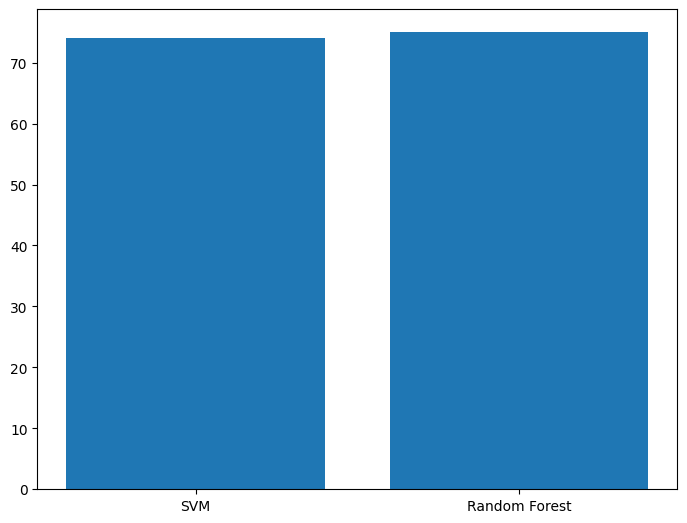

In [41]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['SVM','Random Forest']
percentage = [74,75]
ax.bar(langs,percentage)
plt.show()
